<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-Daily-from-Scratch/blob/main/SPP_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Predictor

In [6]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 11.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [7]:
# Import libraries
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
stocks = input("Enter stock code: ")
data = yf.download(stocks, "2020-01-01", "2022-01-01", auto_adjust=True)
data.head()
# Facebook - FB2A.BE
# Natural Gas - NG=F
# USD/PHP - PHP=X

Enter stock code: NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,2.184,2.188,2.116,2.122,164570
2020-01-03,2.129,2.163,2.083,2.130,144669
2020-01-06,2.112,2.173,2.099,2.135,154678
2020-01-07,2.149,2.178,2.102,2.162,163006
2020-01-08,2.153,2.185,2.115,2.141,242559


In [ ]:
data.shape

(506, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 2020-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    506 non-null    float64
 1   High    506 non-null    float64
 2   Low     506 non-null    float64
 3   Close   506 non-null    float64
 4   Volume  506 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.7 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.933077,3.014715,2.856431,2.931585,149399.021739
std,1.131375,1.175119,1.093247,1.130687,62126.906603
min,1.441000,1.567000,1.432000,1.482000,32233.000000
25%,1.936500,1.978500,1.872000,1.924500,109727.000000
50%,2.682000,2.733000,2.622000,2.687000,145770.000000
75%,3.638000,3.735750,3.571750,3.635250,186976.250000
max,6.321000,6.466000,5.790000,6.312000,381969.000000


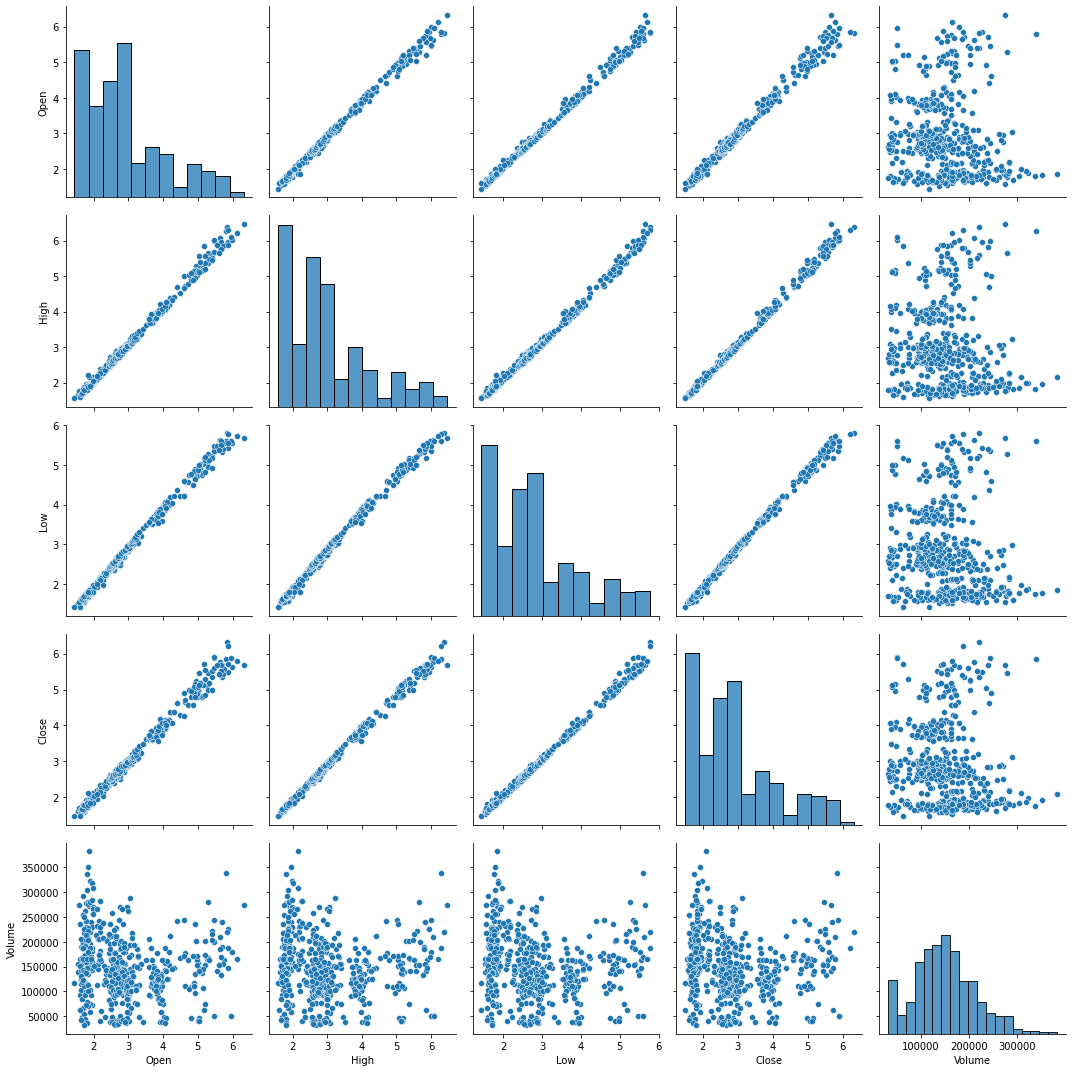

In [ ]:
sns.pairplot(data, height=3)
plt.tight_layout()

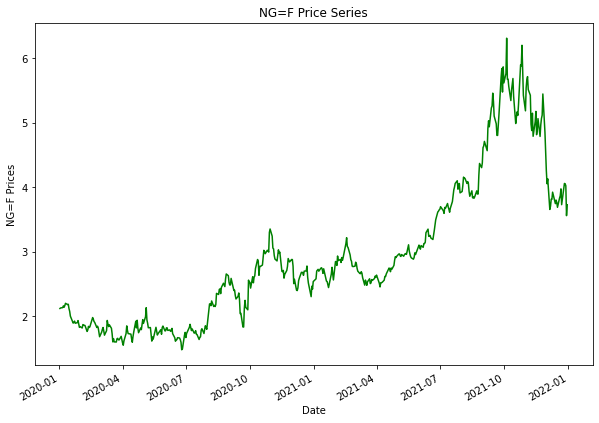

In [ ]:
data.Close.plot(figsize=(10,7), color='g')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


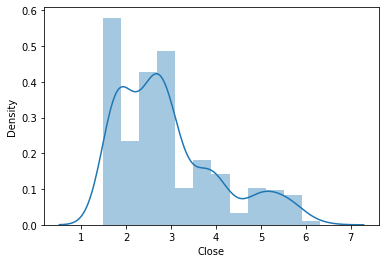

In [ ]:
sns.distplot(data['Close'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


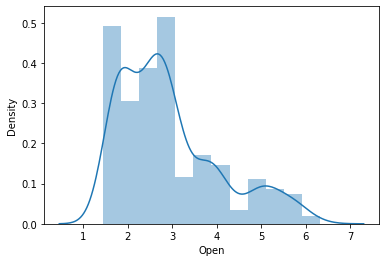

In [ ]:
sns.distplot(data['Open'])

In [10]:
# Conclusions
# - Shape of data
# - data distribution
# - very non linear

# Linear, Logis, Regularized, SVM

X = data.drop("Close", axis=1)
y = data['Close']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 4)
(102, 4)
(404,)
(102,)


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [13]:
# MSE -- > Mean Squared Error
# RMSE -- > Root Mean Squared Error
# r2_square ---> 1.0 - good model

from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
  '''
  y_test: Ground Truth
  y_pred: Model Predicted
  '''

  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  r2_scors = r2_score(y_test, y_pred)

  print("MSE: ", mse) 
  print("RMSE: ", rmse) 
  print("R2 score: ", r2_scors)

calculate_metrics(y_test, pred1)

MSE:  0.0012194921929803088
RMSE:  0.03492122840021967
R2 score:  0.99897687554294


In [14]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

In [15]:
calculate_metrics(y_test, la_p)

MSE:  0.6548015579263041
RMSE:  0.8091980956022475
R2 score:  0.45063732897043773


In [16]:
calculate_metrics(y_test, ri_p)

MSE:  0.002118554547418832
RMSE:  0.046027758444430376
R2 score:  0.9982225839709703


In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

grid = GridSearchCV(SVR(),param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.074 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.049 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.092 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.046 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.091 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.071 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [19]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [20]:
import joblib

joblib.dump(ri, 'model.pkl')

ridg_from_joblib = model = joblib.load('model.pkl')